In [ ]:
#import my csv file from github and then print the head to make sure it imported ok/looks ok

#as there are a number of percentages/currencies, i want to convert these to usable numbers and then to integers or floats using a solution I found on Stackoverflow (see References)

#create pandas dataframe

import pandas as pd
import re
import decimal
D = decimal.Decimal

def make_parser(cls):
    def parse_commas(text):
        return cls(re.sub(r'[^-+\d.]', '', text))
    return parse_commas

to_int = make_parser(int)
to_decimal = make_parser(D)

df = pd.read_csv('https://raw.githubusercontent.com/oheag2/UCDDataAnalytics/main/healthy_life.csv', converters={3: to_decimal, 4: to_decimal, 11: to_decimal})

df.info()
#print(df.head())


In [ ]:
#rename columns to more usable titles and check info to see new titles

df.columns = ["city", "rank", "sunshine", "waterbottle_cost", "obesity_pcnt", "life_expect", "pollution_index", "avghours_worked_annually", "happiness_levels", "outdoor_activities", "takeaway_locations", "gymcost_month"]

df.info()

In [ ]:
import numpy as np
df['sunshine'].replace('-', np.NaN)

0     1858
1     2636
2     1884
3     1821
4     1630
5     1662
6     2769
7     1626
8     2591
9     1938
10    2363
11    2671
12    2624
13    2525
14    2066
15    2769
16    2983
17    2066
18    1662
19     NaN
20    3311
21    2218
22    3542
23    1405
24    3254
25    2584
26    2634
27    1453
28    1877
29    2508
30    1836
31    1776
32    1546
33    3062
34    1662
35    2003
36    1566
37    1633
38    3124
39    1915
40    2528
41    2535
42    1901
43    2555
Name: sunshine, dtype: object

In [ ]:
#convert numbers with currency attached to numeric values using a solution I found on Stackoverflow (see References)

#df[["waterbottle_cost", "gymcost_month"]] = df[["waterbottle_cost", "gymcost_month"]].apply(pd.to_numeric)
#df[["obesity_pcnt"]] = df[["obesity_pcnt"]].apply(pd.to_numeric)
df[["sunshine"]] = df[["sunshine"]].apply(pd.to_numeric)

df.info()

ValueError: ignored

In [ ]:
df

In [ ]:
#check for null values

df.isnull().sum()

city                        0
rank                        0
sunshine_hrs                0
waterbottle_cost            0
obesity_pcnt                0
life_expect                 0
pollution_index             0
avghours_worked_annually    0
happiness_levels            0
outdoor_activities          0
takeaway_locations          0
gymcost_month               0
dtype: int64

                city  rank sunshine_hrs  waterbottle_cost obesity_pcnt  \
25            Mumbai    26         2584              0.15         3.90   
6            Fukuoka     7         2769              0.78         4.30   
28             Tokyo    29         1877              0.76         4.30   
17             Seoul    18         2066              0.59         4.70   
23            Taipei    24         1405              0.57         6.20   
11           Beijing    12         2671              0.26         6.20   
31          Shanghai    32         1776              0.29         6.20   
30         Hong Kong    31         1836              0.75         6.20   
16           Jakarta    17         2983              0.21         6.90   
12           Bangkok    13         2624              0.22        10.00   
19            Geneva    20            -              2.62        19.50   
36            Zurich    37         1566              3.20        19.50   
4         Copenhagen     5         163

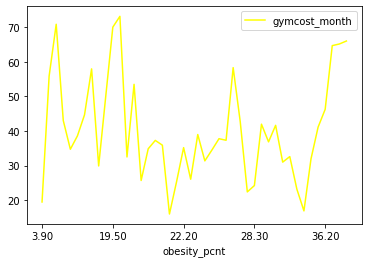

In [ ]:
dfgymobs = df.sort_values(["obesity_pcnt", "gymcost_month"])

print(dfgymobs)

import matplotlib.pyplot as plt
import seaborn as sns
dfgymobs.plot(kind='line', x='obesity_pcnt', y='gymcost_month', color='yellow')

In [ ]:
df.sort_values("vacation_days_offered", ascending=False)

In [ ]:
df.groupby(['vacation_days_offered', 'vacation_days_taken', 'total_score']).mean()

In [ ]:
# Filter where the country is USA
country_USA = df[df["country"] == "USA"]

# See the result
print(country_USA.head())

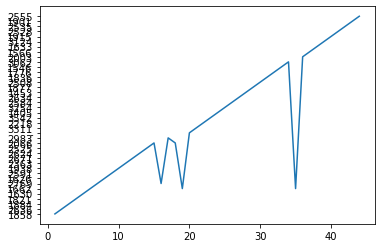

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["rank"], df["sunshine_hrs"])
plt.show()

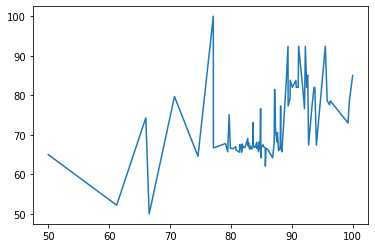

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["total_score"], df["mental_healthcare"])
plt.show()

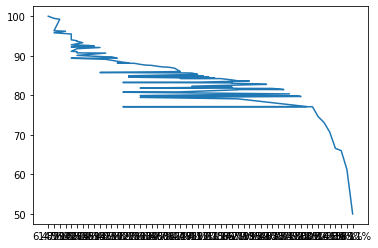

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["inflation"], df["total_score"])
plt.show()

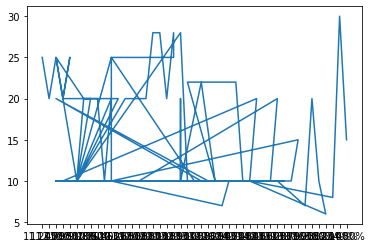

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["overworked"], df["vacation_days_offered"])
plt.show()

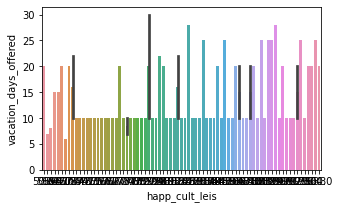

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'happ_cult_leis', y = 'vacation_days_offered', data = df)